In [1]:
import wfdb
from wfdb import processing
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import math
import pandas as pd

In [2]:
record_name = 202

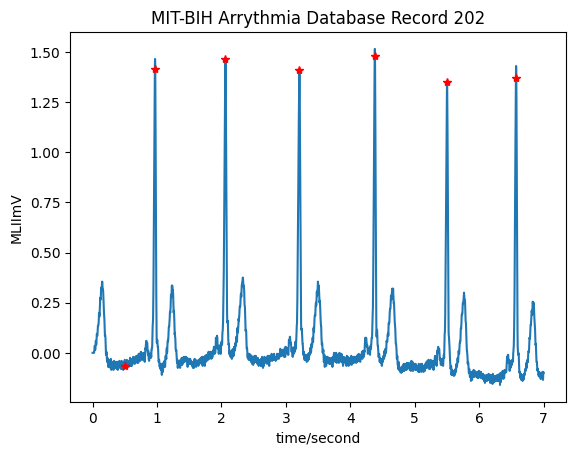

{'record_name': '202',
 'n_sig': 1,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2520,
 'base_time': None,
 'base_date': None,
 'comments': ['68 M 1960 2851 x1',
  'Digoxin, Hydrochlorthiazide, Inderal, KCl',
  'The PVCs are uniform and late-cycle.  This record was taken from the same',
  'analog tape as record 201.'],
 'sig_name': ['MLII'],
 'p_signal': array([[ 0.   ],
        [ 0.   ],
        [ 0.   ],
        ...,
        [-0.125],
        [-0.095],
        [-0.1  ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['202.dat'],
 'fmt': ['212'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [1024],
 'units': ['mV'],
 'adc_res': [11],
 'adc_zero': [1024],
 'init_value': [1024],
 'checksum': [41870],
 'block_size': [0]}

In [4]:
record = wfdb.rdrecord(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', channels=[0], sampfrom=0, sampto=2520)
annotation = wfdb.rdann(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', extension='atr', sampfrom=0, sampto=2520)

wfdb.plot_wfdb(record=record, annotation=annotation, title=f'MIT-BIH Arrythmia Database Record {record_name}', time_units='seconds')
display(record.__dict__)

In [4]:
# Membaca rekaman untuk mendapatkan total sampel
record = wfdb.rdrecord(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', channels=[0])
total_samples = len(record.p_signal)

# Inisialisasi variabel
segment_length = 7200  # Panjang potongan dalam sampel
segments = []  # List untuk menampung potongan-potongan sinyal
annotations = []

# Loop untuk mengambil potongan 7 detik secara berurutan
for start_sample in range(0, total_samples, segment_length):
    end_sample = min(start_sample + segment_length, total_samples)
    
    # Membaca rekaman dan anotasi
    record_segment = wfdb.rdrecord(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', channels=[0], sampfrom=start_sample, sampto=end_sample)
    annotation_segment = wfdb.rdann(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', extension='atr', sampfrom=start_sample, sampto=end_sample)
    segments.append(record_segment)
    annotations.append(annotation_segment)

# Menampilkan list potongan sinyal
for i, segment in enumerate(segments):
    print(f"Segment {i+1}: {segment.p_signal}")


# Menampilkan list potongan sinyal
for i, annotaion in enumerate(annotations):
    print(f"Annotation {i+1}: {annotations}")

Segment 1: [[0.   ]
 [0.   ]
 [0.   ]
 ...
 [0.385]
 [0.235]
 [0.1  ]]
Segment 2: [[-0.015]
 [-0.08 ]
 [-0.105]
 ...
 [-0.24 ]
 [-0.22 ]
 [-0.215]]
Segment 3: [[-0.22 ]
 [-0.235]
 [-0.235]
 ...
 [-0.31 ]
 [-0.3  ]
 [-0.29 ]]
Segment 4: [[-0.29 ]
 [-0.3  ]
 [-0.305]
 ...
 [-0.25 ]
 [-0.24 ]
 [-0.225]]
Segment 5: [[-0.21 ]
 [-0.225]
 [-0.21 ]
 ...
 [-0.35 ]
 [-0.36 ]
 [-0.33 ]]
Segment 6: [[-0.325]
 [-0.34 ]
 [-0.345]
 ...
 [-0.21 ]
 [-0.2  ]
 [-0.19 ]]
Segment 7: [[-0.185]
 [-0.195]
 [-0.21 ]
 ...
 [-0.215]
 [-0.19 ]
 [-0.175]]
Segment 8: [[-0.19 ]
 [-0.185]
 [-0.185]
 ...
 [-0.33 ]
 [-0.315]
 [-0.305]]
Segment 9: [[-0.32 ]
 [-0.325]
 [-0.32 ]
 ...
 [ 0.065]
 [ 0.08 ]
 [ 0.075]]
Segment 10: [[ 0.07 ]
 [ 0.045]
 [ 0.045]
 ...
 [-0.17 ]
 [-0.13 ]
 [-0.11 ]]
Segment 11: [[-0.085]
 [-0.07 ]
 [-0.02 ]
 ...
 [-0.32 ]
 [-0.32 ]
 [-0.315]]
Segment 12: [[-0.325]
 [-0.335]
 [-0.315]
 ...
 [-0.215]
 [-0.225]
 [-0.235]]
Segment 13: [[-0.22 ]
 [-0.215]
 [-0.18 ]
 ...
 [-0.285]
 [-0.3  ]
 [-0.315]]
S

In [5]:
print(annotations[0].symbol)
print(type(segments[0].p_signal))

['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
<class 'numpy.ndarray'>


In [6]:
from collections import Counter

def find_non_N_data(annotations, signal):

    data_signal = [None, None]

    counts = Counter(label for label in annotations if label not in ['N', '+'])
    
    # Jika ada lebih dari satu nilai yang berbeda
    if len(counts) > 1:
        most_common_label = max(counts, key=counts.get)
        data_signal[0] = most_common_label
        data_signal[1] = signal.flatten().tolist()
        return data_signal
    elif len(counts) == 1:
        data_signal[0] = next(iter(counts))
        data_signal[1] = signal.flatten().tolist()
        return data_signal  # Mengambil nilai dari satu-satunya item dalam counts
    else:
        data_signal[0] = 'N'
        data_signal[1] = signal.flatten().tolist()
        return data_signal  # Jika tidak ada nilai yang berbeda selain 'N' atau '+'

# Contoh penggunaan
sinyal = segments[0].p_signal
anotasi = ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'B', 'B']
result = find_non_N_data(anotasi, sinyal)
print(result)


['B', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.015, 0.025, 0.035, 0.035, 0.015, 0.015, 0.025, 0.05, 0.06, 0.055, 0.04, 0.045, 0.065, 0.085, 0.095, 0.085, 0.085, 0.085, 0.105, 0.125, 0.135, 0.135, 0.135, 0.145, 0.15, 0.175, 0.195, 0.2, 0.18, 0.19, 0.215, 0.255, 0.27, 0.275, 0.265, 0.27, 0.28, 0.305, 0.325, 0.32, 0.325, 0.32, 0.335, 0.35, 0.355, 0.335, 0.325, 0.315, 0.315, 0.31, 0.29, 0.265, 0.235, 0.215, 0.195, 0.18, 0.17, 0.14, 0.105, 0.085, 0.09, 0.085, 0.075, 0.045, 0.01, -0.01, -0.01, 0.005, 0.005, -0.015, -0.03, -0.045, -0.045, -0.025, -0.03, -0.03, -0.05, -0.07, -0.05, -0.04, -0.035, -0.05, -0.07, -0.07, -0.06, -0.045, -0.045, -0.06, -0.06, -0.075, -0.05, -0.04, -0.03, -0.035, -0.06, -0.085, -0.065, -0.045, -0.045, -0.05, -0.065, -0.075, -0.06, -0.055, -0.05, -0.06, -0.08, -0.085, -0.075, -0.045, -0.04, -0.055, -0.06, -0.075, -0.065, -0.06, -0.055, -0.055, -0.075, -0.07, -0.05, -0.045, -0.045, -0.055, -0.07, -0.08, -0.075, -0.055, -0.045, -0.06, -0.07, -0.085, -0.065

In [7]:
data = []

for i in range(len(annotations)):
    result = find_non_N_data(annotations[i].symbol, segments[i].p_signal)
    data.append(result)

In [8]:
def process_data(input_data, output_file):
    processed_data = []

    for label, features in input_data:
        # Ubah fitur dari string ke list angka
        features = [float(value) for value in features]
        processed_data.append((label, features))

    # Tulis data yang telah diproses ke dalam file CSV
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Label', 'Data'])  # Tulis header
        writer.writerows(processed_data)

In [9]:
# process_data(data, 'D:\Downloads\\example.csv')

In [10]:
df = pd.read_csv('D:\Downloads\\example.csv')
df.head()

,Label,Data
0,A,"[-0.145, -0.145, -0.145, -0.145, -0.145, -0.14..."
1,N,"[-0.43, -0.425, -0.41, -0.41, -0.4, -0.39, -0...."
2,N,"[-0.37, -0.355, -0.37, -0.38, -0.385, -0.385, ..."
3,N,"[-0.315, -0.31, -0.315, -0.33, -0.34, -0.335, ..."
4,N,"[-0.445, -0.44, -0.44, -0.47, -0.48, -0.49, -0..."


In [11]:
filtered_ecg = nk.ecg_clean(ecg_signal=data[0][1], sampling_rate=record.fs, method='neurokit')
filtered_ecg

array([0.01274883, 0.01253178, 0.01231475, ..., 0.4284571 , 0.26993768,
       0.10803937])

array([  86,  125,  346,  557,  724, 1093, 1343, 1616, 1877])

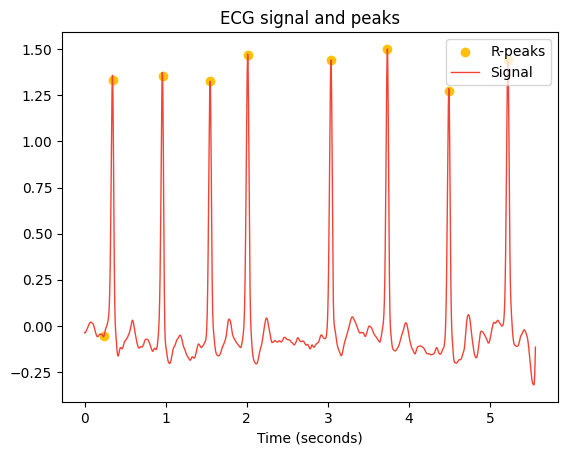

In [37]:
_, info_ecg = nk.ecg_peaks(ecg_cleaned=filtered_ecg, sampling_rate=record.fs, method='rodrigues2021', show=True)
r_peaks_ecg = info_ecg['ECG_R_Peaks']
r_peaks_ecg

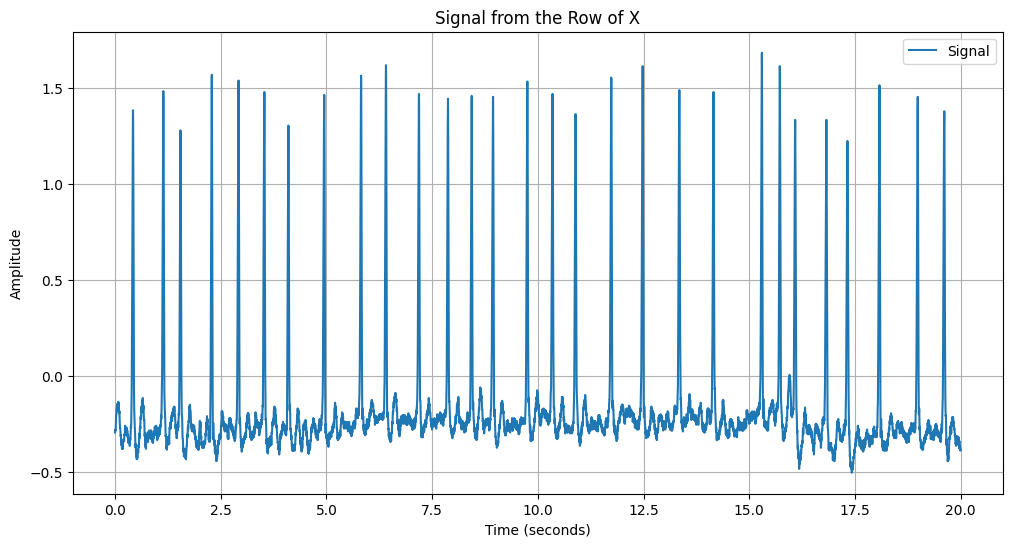

In [13]:
fs = 360

# Create a time axis based on the sampling frequency
time_axis = np.arange(0, len(data[89][1])) / fs

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, data[89][1], label='Signal')
plt.title('Signal from the Row of X')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
process = nk.ecg_process(filtered_ecg, record.fs, 'engzeemod2012')
process

(       ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
 0     0.012749   0.011793  58.846678     0.976942            0            0   
 1     0.012532   0.010422  58.846678     0.976942            0            0   
 2     0.012315   0.010631  58.846678     0.976942            0            0   
 3     0.012200   0.012081  58.846678     0.976942            0            0   
 4     0.012391   0.013765  58.846678     0.976942            0            0   
 ...        ...        ...        ...          ...          ...          ...   
 7195  0.716445   0.752413  55.102041     0.000000            0            0   
 7196  0.578690   0.618659  55.102041     0.000000            0            0   
 7197  0.428457   0.469948  55.102041     0.000000            0            0   
 7198  0.269938   0.311454  55.102041     0.000000            0            0   
 7199  0.108039   0.149207  55.102041     0.000000            0            0   
 
       ECG_P_Onsets  ECG_P_Offsets  EC

In [15]:
type(process[1]['ECG_R_Peaks'])

numpy.ndarray

In [16]:
# Contoh list titik-titik R peak dalam detik
r_peak_times = [0.1, 0.5, 1.2, 1.8, 2.5, 3.0]  # Misalnya, dalam detik

def calculate_rr_intervals(r_peak_times):
    rr_intervals = []
    for i in range(1, len(r_peak_times)):
        rr_interval = r_peak_times[i] - r_peak_times[i-1]
        rr_intervals.append(rr_interval)
    return rr_intervals

# Hitung Interval RR dari titik-titik R peak
rr_intervals = calculate_rr_intervals(process[1]['ECG_R_Peaks'])
print("Interval RR:", rr_intervals)


Interval RR: [78, 236, 236, 413, 422, 403, 386, 391, 411, 422, 417, 393, 400, 400, 413, 403, 391, 392]


In [17]:
# Contoh list waktu P peaks dan R peaks dalam detik
p_peak_times = [0.1, 0.6, 1.3, 1.9, 2.6]  # Misalnya, dalam detik
r_peak_times = [0.5, 1.2, 1.8, 2.5, 3.0]  # Misalnya, dalam detik

def calculate_pr_intervals(p_peak_times, r_peak_times):
    pr_intervals = []
    for p_time, r_time in zip(p_peak_times, r_peak_times):
        pr_interval = r_time - p_time
        pr_intervals.append(pr_interval)
    return pr_intervals

# Hitung Interval PR dari waktu P peaks dan R peaks
pr_intervals = calculate_pr_intervals(process[1]['ECG_P_Peaks'], process[1]['ECG_R_Peaks'])
print("Interval PR:", pr_intervals)


Interval PR: [140, 80, 158, 83, 74, 50, 48, 46, 48, 51, 73, 49, 48, 48, 49, 51, 52, 49, 70]


In [18]:
# Contoh list waktu titik J (atau puncak gelombang Q) dan titik akhir gelombang T dalam detik
j_point_times = [0.1, 0.6, 1.3, 1.9, 2.6]  # Misalnya, dalam detik
t_end_times = [0.5, 1.2, 1.8, 2.5, 3.0]  # Misalnya, dalam detik

def calculate_qt_intervals(q_peak_times, t_offset_times):
    qt_intervals = []
    for q_time, t_time in zip(q_peak_times, t_offset_times):
        qt_interval = t_time - q_time
        qt_intervals.append(qt_interval)
    return qt_intervals

# Hitung Interval QT dari waktu titik Q peaks dan titik T offsets
qt_intervals = calculate_qt_intervals(process[1]['ECG_Q_Peaks'], process[1]['ECG_T_Offsets'])
print("Interval QT:", qt_intervals)

Interval QT: [nan, 143, nan, nan, nan, nan, 150, nan, nan, nan, nan, 155, nan, nan, nan, nan, nan, nan, nan]


In [19]:
def calculate_qrs_width(q_peaks, s_peaks, sampling_rate):
    qrs_widths = []  # List untuk menyimpan lebar kompleks QRS untuk setiap pasangan Q-S

    # Pastikan panjang list Q peaks dan S peaks sama
    if len(q_peaks) == len(s_peaks):
        for i in range(len(q_peaks)):
            # Hitung lebar QRS dalam detik
            qrs_width_seconds = (s_peaks[i] - q_peaks[i]) / sampling_rate
            qrs_widths.append(qrs_width_seconds)
        
        return qrs_widths
    else:
        return None  # Kembalikan None jika panjang list tidak sama

# Contoh data Q peaks dan S peaks
q_peaks = [358, 652, 935, 1221, 1504, 1798, 2033, None]  # Misalnya, indeks Q peaks
s_peaks = [471, 756, 957, 1322, 1614, 1842, 2141, None]  # Misalnya, indeks S peaks
sampling_rate = 360  # Misalnya, frekuensi sampling 360 Hz

# Hitung lebar kompleks QRS untuk setiap pasangan Q-S
qrs_widths = calculate_qrs_width(process[1]['ECG_Q_Peaks'], process[1]['ECG_Q_Peaks'], sampling_rate)
print("Lebar kompleks QRS untuk setiap pasangan Q-S:", qrs_widths)


Lebar kompleks QRS untuk setiap pasangan Q-S: [nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan]


In [20]:
def remove_nan(data):
    """Menghapus nilai NaN dari list."""
    return [x for x in data if not np.isnan(x)]


def find_minimum(data):
    """Mencari nilai minimum dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        minimum = cleaned_data[0]
        for value in cleaned_data[1:]:
            if value < minimum:
                minimum = value
        return minimum
    else:
        return None

def find_maximum(data):
    """Mencari nilai maksimum dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        maximum = cleaned_data[0]
        for value in cleaned_data[1:]:
            if value > maximum:
                maximum = value
        return maximum
    else:
        return None

def find_average(data):
    """Mencari rata-rata nilai dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        total = sum(cleaned_data)
        average = total / len(cleaned_data)
        return average
    else:
        return None

def find_median(data):
    """Mencari median nilai dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        sorted_data = sorted(cleaned_data)
        n = len(sorted_data)
        if n % 2 == 0:
            median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
        else:
            median = sorted_data[n // 2]
        return median
    else:
        return None

def find_skewness(data):
    """Mencari skewness dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        n = len(cleaned_data)
        mean = find_average(cleaned_data)
        numerator = sum((x - mean) ** 3 for x in cleaned_data)
        denominator = ((n - 1) * (n - 2) * (n - 3)) ** 0.5
        skewness = numerator / (denominator * n)
        return skewness
    else:
        return None

def find_kurtosis(data):
    """Mencari kurtosis dalam list."""
    cleaned_data = remove_nan(data)
    if cleaned_data:
        n = len(cleaned_data)
        mean = find_average(cleaned_data)
        numerator = sum((x - mean) ** 4 for x in cleaned_data)
        denominator = ((n - 1) * (n - 2) * (n - 3) * (n - 4)) / n
        kurtosis = numerator / denominator - 3
        return kurtosis
    else:
        return None


In [21]:
import ast

data_signal = df['Data']
ast.literal_eval(data_signal[0])

[-0.145,
 -0.145,
 -0.145,
 -0.145,
 -0.145,
 -0.145,
 -0.145,
 -0.145,
 -0.12,
 -0.135,
 -0.145,
 -0.15,
 -0.16,
 -0.155,
 -0.16,
 -0.175,
 -0.18,
 -0.185,
 -0.17,
 -0.155,
 -0.175,
 -0.18,
 -0.19,
 -0.18,
 -0.155,
 -0.135,
 -0.155,
 -0.19,
 -0.205,
 -0.235,
 -0.225,
 -0.245,
 -0.25,
 -0.26,
 -0.275,
 -0.275,
 -0.275,
 -0.265,
 -0.255,
 -0.265,
 -0.275,
 -0.29,
 -0.29,
 -0.29,
 -0.29,
 -0.285,
 -0.295,
 -0.305,
 -0.285,
 -0.275,
 -0.275,
 -0.28,
 -0.285,
 -0.305,
 -0.29,
 -0.3,
 -0.28,
 -0.29,
 -0.3,
 -0.315,
 -0.32,
 -0.335,
 -0.36,
 -0.385,
 -0.385,
 -0.405,
 -0.455,
 -0.485,
 -0.485,
 -0.425,
 -0.33,
 -0.22,
 -0.07,
 0.12,
 0.375,
 0.62,
 0.78,
 0.84,
 0.765,
 0.52,
 0.17,
 -0.165,
 -0.365,
 -0.435,
 -0.425,
 -0.37,
 -0.33,
 -0.325,
 -0.335,
 -0.345,
 -0.33,
 -0.325,
 -0.315,
 -0.31,
 -0.32,
 -0.335,
 -0.34,
 -0.325,
 -0.345,
 -0.335,
 -0.33,
 -0.335,
 -0.33,
 -0.325,
 -0.33,
 -0.33,
 -0.345,
 -0.355,
 -0.335,
 -0.325,
 -0.305,
 -0.32,
 -0.32,
 -0.33,
 -0.34,
 -0.335,
 -0.34,
 -0.3

In [22]:
print(data[0][1][-1])

0.1


In [23]:
type(process[1]['ECG_R_Peaks'])

numpy.ndarray

In [24]:
list_data_ready_csv = []

for i in range(0, len(data), 1):

    print(i)

    feature_and_label = []
    feature_and_label.append(data[i][0])

    filtered_ecg = nk.ecg_clean(ecg_signal=data[i][1], sampling_rate=record.fs, method='neurokit')
    process = nk.ecg_process(filtered_ecg, record.fs, 'engzeemod2012')

    rr_intervals = calculate_rr_intervals(process[1]['ECG_R_Peaks'])
    pr_intervals = calculate_pr_intervals(process[1]['ECG_P_Peaks'], process[1]['ECG_R_Peaks'])
    qt_intervals = calculate_qt_intervals(process[1]['ECG_Q_Peaks'], process[1]['ECG_T_Offsets'])
    qrs_widths = calculate_qrs_width(process[1]['ECG_Q_Peaks'], process[1]['ECG_S_Peaks'], sampling_rate)

    print(rr_intervals)
    print(pr_intervals)
    print(qt_intervals)
    print(qrs_widths)

    min_rr = find_minimum(remove_nan(rr_intervals))
    max_rr = find_maximum(remove_nan(rr_intervals))
    avg_rr = find_average(remove_nan(rr_intervals))
    median_rr = find_median(remove_nan(rr_intervals))    
    skew_rr = find_skewness(remove_nan(rr_intervals))
    kurtosis_rr = find_kurtosis(remove_nan(rr_intervals))

    feature_and_label.append(min_rr)
    feature_and_label.append(max_rr)
    feature_and_label.append(avg_rr)
    feature_and_label.append(median_rr)
    feature_and_label.append(skew_rr)
    feature_and_label.append(kurtosis_rr)

    min_pr = find_minimum(remove_nan(pr_intervals))
    max_pr = find_maximum(remove_nan(pr_intervals))
    avg_pr = find_average(remove_nan(pr_intervals))
    median_pr = find_median(remove_nan(pr_intervals))    
    skew_pr = find_skewness(remove_nan(pr_intervals))
    kurtosis_pr = find_kurtosis(remove_nan(pr_intervals))
    
    feature_and_label.append(min_pr)
    feature_and_label.append(max_pr)
    feature_and_label.append(avg_pr)
    feature_and_label.append(median_pr)
    feature_and_label.append(skew_pr)
    feature_and_label.append(kurtosis_pr)

    min_qt = find_minimum(remove_nan(qt_intervals))
    max_qt = find_maximum(remove_nan(qt_intervals))
    avg_qt = find_average(remove_nan(qt_intervals))
    median_qt = find_median(remove_nan(qt_intervals))    
    skew_qt = find_skewness(remove_nan(qt_intervals))
    kurtosis_qt = find_kurtosis(remove_nan(qt_intervals))

    feature_and_label.append(min_qt)
    feature_and_label.append(max_qt)
    feature_and_label.append(avg_qt)
    feature_and_label.append(median_qt)
    feature_and_label.append(skew_qt)
    feature_and_label.append(kurtosis_qt)

    min_qrs = find_minimum(remove_nan(qrs_widths))
    max_qrs = find_maximum(remove_nan(qrs_widths))
    avg_qrs = find_average(remove_nan(qrs_widths))
    median_qrs = find_median(remove_nan(qrs_widths))    
    skew_qrs = find_skewness(remove_nan(qrs_widths))
    kurtosis_qrs = find_kurtosis(remove_nan(qrs_widths))

    feature_and_label.append(min_qrs)
    feature_and_label.append(max_qrs)
    feature_and_label.append(avg_qrs)
    feature_and_label.append(median_qrs)
    feature_and_label.append(skew_qrs)
    feature_and_label.append(kurtosis_qrs)

    list_data_ready_csv.append(feature_and_label)

0
[78, 236, 236, 413, 422, 403, 386, 391, 411, 422, 417, 393, 400, 400, 413, 403, 391, 392]
[140, 80, 158, 83, 74, 50, 48, 46, 48, 51, 73, 49, 48, 48, 49, 51, 52, 49, 70]
[nan, 143, nan, nan, nan, nan, 150, nan, nan, nan, nan, 155, nan, nan, nan, nan, nan, nan, nan]
[nan, 0.48333333333333334, nan, nan, nan, nan, 0.19444444444444445, nan, nan, nan, nan, 0.18611111111111112, nan, nan, nan, nan, nan, nan, nan]
1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[419, 396, 404, 417, 431, 396, 396, 389, 392, 406, 408, 391, 392, 397, 420]
[53, 71, 47, 73, 52, 52, 55, 47, 49, 52, 50, 52, 47, 48, 48, 69]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
2
[403, 403, 420, 433, 415, 385, 384, 401, 419, 393, 394, 390, 401, 420, 425, 424]
[49, 46, 47, 50, 53, 49, 49, 49, 52, 51, 52, 46, 48, 49, 50, 51, 66]
[nan, 147, nan, nan, nan, nan, nan, 158, nan, nan, nan, nan, nan, 157, nan, nan, nan]
[nan, 0.20277777777777778, nan, nan, nan, nan, nan, 0.2, nan, nan, nan, nan, nan, 0.19722222222222222, nan, nan, nan]
3


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[398, 424, 428, 421, 400, 401, 426, 424, 411, 393, 390, 404, 422, 417, 412, 394]
[47, 70, 80, 51, 82, 47, 49, 51, 51, 68, 48, 47, 49, 52, 52, 46, 46]
[147, nan, 164, nan, nan, nan, nan, 161, 156, 158, nan, nan, nan, nan, nan, nan, nan]
[0.18055555555555555, nan, 0.2111111111111111, nan, nan, nan, nan, 0.2111111111111111, 0.17777777777777778, 0.19444444444444445, nan, nan, nan, nan, nan, nan, nan]
4
[397, 398, 433, 433, 397, 384, 384, 390, 402, 396, 398, 386, 388, 414]
[82, 48, 49, 88, 50, 50, 47, 48, 51, 50, 50, 49, 50, 49, 50]
[nan, 150, nan, 166, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, 0.17222222222222222, nan, 0.18611111111111112, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
5


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[386, 383, 409, 414, 408, 400, 393, 413, 425, 417, 406, 391, 389, 410, 414, 412]
[51, 48, 51, 54, 54, 49, 75, 87, 52, 52, 49, 49, 48, 46, 53, 52, 69]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 161, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.20277777777777778, nan, nan, nan, nan, nan, nan]
6


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = numerator / denominator - 3


[410, 429, 412, 396, 393, 410, 431, 419, 410, 401, 404, 415, 424, 408, 395, 391]
[48, 51, 50, 46, 49, 46, 85, 51, 49, 48, 47, 47, 68, 49, 47, 79, 93]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
7
[391, 392, 410, 438, 426, 408, 412, 420, 428, 422, 399, 393, 392, 409]
[49, 47, 49, 52, 52, 51, 48, 49, 53, 51, 51, 47, 48, 50, 52]
[nan, nan, nan, nan, nan, 158, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, 0.18333333333333332, nan, nan, nan, nan, nan, nan, nan, nan, nan]
8


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = numerator / denominator - 3


[398, 421, 434, 419, 391, 399, 409, 421, 416, 402, 401, 406, 420, 427, 404]
[89, 50, 77, 53, 51, 67, 70, 93, 50, 50, 49, 48, 51, 50, 73, 48]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 168, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.19722222222222222, nan]
9


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = numerator / denominator - 3


[429, 407, 388, 397, 424, 430, 417, 399, 398, 412, 420, 420, 408, 388]
[52, 52, 52, 47, 51, 52, 48, 50, 47, 49, 73, 51, 53, 47, 92]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 164, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.20277777777777778, nan, nan]
10


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = numerator / denominator - 3


[414, 394, 401, 437, 435, 422, 404, 409, 427, 420, 420, 390, 383, 400, 425]
[52, 50, 46, 49, 53, 50, 50, 48, 50, 52, 90, 49, 88, 46, 50, 52]
[nan, nan, nan, nan, 172, nan, 158, nan, nan, 158, nan, 162, nan, nan, nan, nan]
[nan, nan, nan, nan, 0.2111111111111111, nan, 0.18055555555555555, nan, nan, 0.18333333333333332, nan, 0.21666666666666667, nan, nan, nan, nan]
11


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[400, 384, 396, 421, 415, 403, 385, 386, 411, 415, 408, 397, 391, 406, 425, 424, 407]
[53, 48, 82, 50, 70, 51, 49, 65, 50, 51, 50, 51, 85, 47, 49, 51, 49, 67]
[165, nan, nan, nan, nan, 157, nan, nan, 166, nan, nan, nan, nan, nan, nan, 167, nan, nan]
[0.2222222222222222, nan, nan, nan, nan, 0.18333333333333332, nan, nan, 0.20277777777777778, nan, nan, nan, nan, nan, nan, 0.19444444444444445, nan, nan]
12


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[547, 426, 427, 386, 387, 382, 406, 398, 397, 395, 388, 401, 424, 424, 413, 393, 385]
[144, 51, 47, 79, 52, 45, 50, 55, 53, 50, 50, 48, 51, 53, 51, 49, 49, 50]
[nan, nan, 167, nan, 292, 150, nan, 162, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, 0.20833333333333334, nan, 0.46944444444444444, 0.16666666666666666, nan, 0.23333333333333334, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
13


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[375, 241, 409, 397, 389, 403, 403, 401, 379, 378, 389, 407, 408, 406, 399, 391, 409]
[130, 82, 52, 49, 49, 89, 67, 50, 52, 51, 49, 53, 52, 54, 49, 50, 48, 53]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 162, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.2111111111111111, nan, nan, nan, nan, nan, nan]
14


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = numerator / denominator - 3


[392, 399, 412, 436, 424, 399, 403, 408, 419, 423, 402, 398, 395, 420, 433, 418]
[52, 48, 80, 51, 53, 50, 47, 49, 51, 51, 52, 49, 48, 49, 49, 51, 85]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
15
[412, 421, 405, 380, 385, 412, 421, 407, 405, 401, 411, 429, 436, 421, 400, 403]
[49, 53, 54, 50, 49, 49, 51, 53, 51, 48, 87, 71, 50, 52, 48, 47, 69]
[nan, nan, nan, 159, nan, nan, nan, nan, nan, nan, nan, nan, nan, 167, nan, nan, nan]
[nan, nan, nan, 0.18888888888888888, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.19722222222222222, nan, nan, nan]
16


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)


[414, 395, 403, 430, 429, 423, 409, 410, 424, 433, 421, 422, 400, 414, 431]
[54, 51, 46, 87, 54, 51, 50, 48, 52, 52, 51, 63, 73, 47, 52, 88]
[167, nan, 151, nan, nan, nan, nan, nan, 158, nan, 164, nan, nan, nan, nan, nan]
[0.20833333333333334, nan, 0.175, nan, nan, nan, nan, nan, 0.20277777777777778, nan, 0.18333333333333332, nan, nan, nan, nan, nan]
17


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[105, 406, 394, 416, 432, 418, 410, 392, 402, 417, 418, 419, 397, 391, 415, 428, 423]
[84, 53, 48, 76, 76, 56, 51, 50, 51, 51, 53, 74, 51, 75, 77, 53, 74, 50]
[130, 161, 153, 146, nan, 168, nan, 153, nan, 157, nan, nan, nan, 151, nan, nan, nan, nan]
[0.23055555555555557, 0.19444444444444445, 0.17777777777777778, 0.16944444444444445, nan, 0.19166666666666668, nan, 0.21388888888888888, nan, 0.18055555555555555, nan, nan, nan, 0.18611111111111112, nan, nan, nan, nan]
18
[424, 409, 400, 389, 408, 433, 426, 422, 403, 399, 421, 429, 417, 393, 380]
[74, 55, 50, 68, 50, 54, 52, 50, 50, 49, 47, 51, 52, 50, 86, 49]
[171, nan, nan, nan, 157, nan, nan, nan, 159, nan, nan, nan, 163, nan, 154, nan]
[0.22777777777777777, nan, nan, nan, 0.2111111111111111, nan, nan, nan, 0.20555555555555555, nan, nan, nan, 0.19166666666666668, nan, 0.18333333333333332, nan]
19
[401, 383, 384, 404, 436, 432, 424, 414, 408, 421, 425, 418, 395, 392, 408, 431]
[54, 82, 49, 90, 49, 51, 49, 48, 82, 92, 51, 50, 50, 46, 48, 5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[270, 421, 448, 445, 423, 430, 429, 433, 431, 421, 386, 369, 379, 399, 405]
[47, 65, 74, 56, 53, 47, 49, 53, 52, 49, 46, 49, 51, 53, 87, 86]
[nan, 147, nan, nan, 160, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, 0.19166666666666668, nan, nan, 0.20555555555555555, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
21


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)


[411, 438, 423, 400, 399, 409, 424, 424, 408, 392, 392, 413, 408, 403, 382, 381]
[49, 52, 73, 51, 47, 71, 52, 89, 51, 49, 74, 50, 53, 51, 48, 46, 50]
[nan, nan, 167, nan, nan, 156, nan, nan, 163, nan, nan, 159, nan, nan, 157, nan, nan]
[nan, nan, 0.20833333333333334, nan, nan, 0.17222222222222222, nan, nan, 0.18611111111111112, nan, nan, 0.19166666666666668, nan, nan, 0.17222222222222222, nan, nan]
22
[424, 418, 397, 396, 413, 424, 418, 406, 395, 398, 416, 423, 411, 391, 389, 412, 431]
[74, 53, 50, 86, 50, 51, 49, 85, 84, 49, 67, 51, 53, 48, 89, 78, 70, 52]
[167, nan, nan, nan, nan, 160, nan, nan, nan, nan, nan, 156, 159, 148, nan, nan, nan, nan]
[0.21666666666666667, nan, nan, nan, nan, 0.19444444444444445, nan, nan, nan, nan, nan, 0.18055555555555555, 0.18333333333333332, 0.16944444444444445, nan, nan, nan, nan]
23
[174, 401, 398, 423, 434, 413, 396, 388, 395, 409, 406, 387, 388, 371, 384, 388, 389, 376]
[149, 71, 47, 49, 71, 77, 50, 83, 49, 49, 50, 54, 137, 46, 49, 50, 87, 52, 101]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[401, 389, 389, 409, 411, 412, 405, 392, 395, 422, 424, 419, 392, 397, 428]
[50, 48, 90, 72, 51, 52, 51, 48, 48, 75, 50, 50, 49, 47, 49, 73]
[nan, nan, nan, nan, nan, 160, nan, 146, 148, nan, 157, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, 0.18611111111111112, nan, 0.18055555555555555, 0.17777777777777778, nan, 0.18611111111111112, nan, nan, nan, nan, nan]
26


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[389, 407, 407, 404, 399, 385, 389, 414, 421, 410, 395, 386, 405, 421, 405]
[71, 51, 54, 55, 51, 45, 48, 79, 51, 89, 48, 46, 47, 53, 52, 47]
[145, nan, 162, nan, nan, nan, nan, nan, nan, nan, 157, nan, nan, 157, 162, nan]
[0.17222222222222222, nan, 0.17222222222222222, nan, nan, nan, nan, nan, nan, nan, 0.17777777777777778, nan, nan, 0.20555555555555555, 0.19444444444444445, nan]
27
[398, 421, 414, 400, 398, 399, 408, 417, 405, 392, 387, 387, 408, 391, 360, 357, 363]
[47, 71, 51, 50, 47, 47, 51, 49, 50, 68, 49, 47, 52, 84, 51, 64, 45, nan]
[148, 159, 155, nan, nan, nan, nan, nan, 157, nan, 147, 200, nan, nan, nan, 148, nan, nan]
[0.1638888888888889, 0.18055555555555555, 0.18611111111111112, nan, nan, nan, nan, nan, 0.18611111111111112, nan, 0.18333333333333332, 0.33055555555555555, nan, nan, nan, 0.16111111111111112, nan, nan]
28
[385, 369, 351, 363, 377, 405, 416, 403, 394, 392, 402, 423, 419, 390, 386, 394, 400]
[54, 51, 50, 49, 49, 54, 50, 52, 50, 51, 48, 54, 53, 84, 46, 48, 52, 56]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[62, 395, 417, 428, 407, 385, 393, 418, 418, 415, 403, 395, 408, 418, 422, 406, 395]
[96, 63, 66, 68, 68, 63, 62, 62, 69, 68, 64, 63, 62, 65, 66, 66, 64, 61]
[144, nan, 168, 180, 168, 150, 155, 161, 172, 170, 158, nan, nan, 161, 173, 168, 161, nan]
[0.4722222222222222, nan, 0.20833333333333334, 0.22777777777777777, 0.20555555555555555, 0.17222222222222222, 0.18611111111111112, 0.20833333333333334, 0.21944444444444444, 0.2111111111111111, 0.20277777777777778, nan, nan, 0.20833333333333334, 0.22777777777777777, 0.23055555555555557, 0.2, nan]
52
[428, 419, 389, 402, 424, 441, 418, 401, 419, 427, 432, 418, 408, 406, 417, 436]
[65, 68, 64, 62, 64, 69, 67, 65, 66, 66, 70, 68, 66, 65, 65, 61, nan]
[nan, 167, 152, 155, 159, 172, 167, 156, 161, nan, nan, 169, 153, 161, 146, nan, nan]
[nan, 0.2111111111111111, 0.19166666666666668, 0.18888888888888888, 0.20833333333333334, 0.2222222222222222, 0.225, 0.21666666666666667, 0.2111111111111111, nan, nan, 0.2222222222222222, 0.19166666666666668, 0.2083

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[161, 428, 187, 155, 385, 175, 146, 386, 187, 170, 396, 180, 517, 182, 508, 176, 153, 390, 181, 160, 370, 175, 151, 265, 195, 192, 168]
[nan, 68, 71, nan, 67, 65, 42, 60, 68, nan, nan, 33, nan, 66, nan, 67, nan, 61, 74, nan, 73, 69, nan, 68, nan, 42, 31, 68]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.23055555555555557, 0.2388888888888889, 0.225, 0.225, 0.2972222222222222, 0.23055555555555557, 0.17222222222222222, 0.225, 0.21944444444444444, 0.21388888888888888, 0.2638888888888889, 0.2361111111111111, 0.23055555555555557, 0.21388888888888888, 0.17222222222222222, 0.225, 0.18888888888888888, 0.16111111111111112, 0.25, 0.24166666666666667, 0.2861111111111111, 0.21666666666666667, 0.23333333333333334, 0.2833333333333333, nan, nan, nan, nan]
59
[187, 223, 157, 157, 222, 222, 181, 183, 211, 174, 168, 177, 170, 170, 199, 193, 160, 160, 209, 209, 210, 177, 178, 170, 176, 173, 185, 171, 173, 172

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)


[237, 223, 199, 224, 224, 181, 174, 170, 158, 164, 165, 163, 160, 221, 221, 173, 176, 170, 178, 186, 167, 163, 159, 166, 148, 166, 182, 165, 173, 175, 178, 171, 180, 170, 205, 205, 225]
[31, 49, nan, 40, nan, 39, 30, 36, 40, 31, nan, nan, 40, nan, nan, 36, nan, nan, nan, nan, 45, nan, 48, 35, 37, nan, nan, 26, 32, 31, nan, nan, nan, 40, 30, nan, 49, 42]
[nan, nan, nan, nan, 82, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 52, nan, nan]
[nan, nan, nan, nan, 0.2638888888888889, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.25277777777777777, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.325, 0.23333333333333334, nan]
61


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[172, 174, 178, 168, 208, 155, 165, 158, 172, 168, 255, 167, 184, 213, 177, 230, 208, 206, 206, 188, 253, 211, 233, 209, 221, 230, 155, 242, 153, 159, 153, 163, 168, 169]
[nan, 37, 35, 55, 44, 35, 32, 41, 45, 39, 48, 35, 65, 61, 39, nan, 47, nan, 52, 44, 59, 57, 47, nan, 34, 39, 36, nan, 39, 41, nan, 42, 38, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, 0.25, 0.23055555555555557, nan, nan, nan, nan, nan, nan, nan, nan, 0.24444444444444444, nan, nan, nan, 0.2222222222222222, 0.23333333333333334, nan, 0.2361111111111111, 0.21666666666666667, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
62
[232, 161, 160, 233, 181, 216, 253, 176, 175, 147, 148, 168, 157, 152, 155, 154, 154, 156, 159, 157, 165, 165, 163, 180, 169, 153, 158, 152, 161, 171, 209, 177, 211, 173, 170, 168, 160, 158, 160]
[nan, 41, nan, 29, 33, 56, 39, 28,

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)


[162, 318, 230, 285, 219, 173, 190, 253, 463, 253, 193, 212, 295, 176, 159, 306, 314, 176, 289, 273, 199, 163, 332, 263, 165, 162, 141]
[36, 84, 58, 68, 40, 50, 90, 42, 51, 85, 47, 47, 91, 38, 86, 81, 66, 60, 51, 59, 36, 44, 81, nan, 42, 81, 86, 60]
[152, 155, nan, nan, nan, nan, 138, nan, nan, 154, nan, nan, nan, nan, 131, 142, nan, nan, nan, nan, nan, nan, nan, nan, nan, 148, 161, nan]
[0.2388888888888889, 0.2361111111111111, nan, nan, nan, nan, 0.19722222222222222, nan, nan, 0.26944444444444443, nan, nan, nan, nan, 0.18888888888888888, 0.2111111111111111, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.23333333333333334, 0.2861111111111111, nan]
66
[182, 209, 215, 187, 213, 158, 168, 267, 198, 136, 162, 210, 241, 266, 162, 214, 157, 239, 155, 274, 275, 261, 259, 294, 204, 234, 177, 226, 185, 486]
[85, 61, 38, 43, 42, 72, 43, 42, 39, 69, 57, 43, 46, 36, 48, 78, 46, 69, nan, 69, nan, 72, nan, 70, 54, 58, 34, 53, 53, 51, nan]
[140, nan, nan, nan, nan, nan, nan, nan, nan, 107, 129, nan, 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[378, 236, 237, 182, 182, 154, 204, 163, 214, 286, 299, 230, 229, 236, 292, 184, 241, 211, 269, 242, 181, 227, 315, 226, 246, 156, 246, 245, 172]
[56, 42, 38, 44, 82, 71, 42, 59, 33, 61, 92, 34, 52, 57, 88, 35, 41, 88, 54, 77, 37, nan, 35, 91, 64, 35, 75, 51, 58, 85]
[nan, nan, nan, nan, 144, nan, nan, 123, 167, 138, nan, nan, nan, nan, 154, nan, nan, nan, nan, nan, nan, 167, nan, nan, 157, nan, 159, nan, nan, nan]
[nan, nan, nan, nan, 0.20833333333333334, nan, nan, 0.18888888888888888, 0.2916666666666667, 0.19444444444444445, nan, nan, nan, nan, 0.2361111111111111, nan, nan, nan, nan, nan, nan, 0.3055555555555556, nan, nan, 0.17777777777777778, nan, 0.23055555555555557, nan, nan, nan]
71
[221, 221, 163, 211, 211, 159, 266, 168, 247, 262, 306, 293, 243, 276, 222, 225, 322, 279, 211, 224, 285, 234, 247, 225, 235, 235, 294, 323]
[27, 27, 76, 79, 54, 53, 40, 74, 47, 63, 50, 55, 36, 61, 31, 31, 51, 47, 53, 49, 51, 78, 41, 58, 54, 82, 60, 29, 43]
[nan, nan, 103, 132, nan, nan, nan, nan, 152

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[252, 199, 230, 273, 298, 227, 228, 187, 233, 246, 301, 265, 228, 246, 260, 231, 175, 259, 336, 273, 198, 278, 233, 223, 152, 231, 198, 225, 174]
[51, 56, 64, 37, 47, 50, 44, 64, 56, 48, 60, 34, 52, 62, 40, 36, 40, 33, 32, 82, 79, 60, 30, 67, 46, 67, 47, 51, 43, 84]
[123, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 168, 161, nan, 128, 118, nan, nan, nan, 136, nan, nan, nan, nan]
[0.17777777777777778, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.2916666666666667, 0.28888888888888886, nan, 0.20555555555555555, 0.3888888888888889, nan, nan, nan, 0.18333333333333332, nan, nan, nan, nan]
73
[229, 162, 190, 163, 317, 253, 202, 165, 158, 231, 191, 141, 238, 233, 203, 270, 148, 174, 252, 311, 268, 289, 217, 313, 194, 195, 265, 393, 320]
[52, 72, 73, 54, 41, 49, 36, 46, 38, 79, nan, 42, 57, 52, 56, 59, 57, 66, 93, 57, 92, 56, 55, 50, 35, nan, 44, 55, 55, nan]
[136, nan, 144, nan, 161, nan, nan, nan, 158, 137, nan, nan, 128

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[214, 169, 156, 160, 163, 155, 162, 170, 172, 176, 172, 166, 165, 159, 155, 156, 157, 160, 155, 164, 169, 170, 173, 165, 164, 165, 158, 156, 156, 157, 159, 159, 166, 169, 163, 168, 164, 166, 164, 159, 161]
[59, 45, 27, 46, 38, 52, 59, 38, 65, 39, 38, 36, 36, 64, 47, 44, 35, 35, 52, 51, 52, 35, 38, 37, 51, 31, 63, 61, 57, 35, 64, 33, 45, nan, 33, nan, 33, nan, 42, 32, 64, 30]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[0.2361111111111111, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.23333333333333334, 0.2388888888888889, nan, nan, nan, nan, nan, nan, nan, nan, 0.2388888888888889, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.24166666666666667, nan]
78
[158, 154, 162, 161, 150, 165, 163, 167, 168, 157, 157, 150, 148, 155, 153, 157, 153, 161, 165, 169, 168, 166, 157, 160,

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[247, 194, 193, 194, 285, 286, 222, 223, 304, 304, 279, 253, 206, 152, 221, 210, 186, 187, 214, 242, 254, 201, 239, 226, 257, 254, 197, 172, 236, 280]
[68, 64, 37, 43, 36, 63, 50, 40, 60, 57, 41, 38, 65, 44, 78, 53, 72, 38, 43, 44, 40, 59, 47, 88, 43, 60, 56, 48, 90, 56, nan]
[97, nan, nan, 53, nan, 142, nan, 66, nan, 81, nan, nan, 132, nan, 134, nan, nan, 176, nan, nan, nan, nan, nan, nan, nan, nan, 135, nan, 163, nan, nan]
[0.18333333333333332, nan, nan, 0.05, nan, 0.2638888888888889, nan, 0.26944444444444443, nan, 0.3277777777777778, nan, nan, 0.18333333333333332, nan, 0.2222222222222222, nan, nan, 0.3472222222222222, nan, nan, nan, nan, nan, nan, nan, nan, 0.21666666666666667, nan, 0.25555555555555554, nan, nan]
80
[317, 239, 173, 274, 248, 252, 343, 249, 298, 191, 187, 279, 312, 332, 257, 248, 141, 270, 185, 216, 297, 228, 275, 175, 153, 139, 170, 222]
[64, 33, 74, 63, 31, 53, 61, 30, 67, 49, 30, 40, 59, 51, 70, 50, 61, 63, 55, 44, 54, 55, 65, 85, 87, 74, 54, 42, 66]
[131, nan, 10

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[202, 251, 169, 344, 194, 237, 170, 271, 289, 255, 218, 262, 375, 260, 232, 255, 158, 294, 229, 259, 308, 198, 344, 208, 195, 261]
[39, 58, 57, 53, 73, 97, 36, 76, 50, 53, 75, 55, 68, 59, 55, 57, 91, 75, 30, 39, 80, 43, 49, 56, 48, nan, 85]
[nan, nan, nan, 163, nan, 191, nan, nan, nan, nan, nan, nan, 152, nan, nan, nan, 174, 146, nan, nan, 151, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, 0.275, nan, 0.25555555555555554, nan, nan, nan, nan, nan, nan, 0.16944444444444445, nan, nan, nan, 0.28055555555555556, 0.21388888888888888, nan, nan, 0.19722222222222222, nan, nan, nan, nan, nan, nan]
84
[171, 258, 268, 267, 340, 212, 270, 222, 198, 193, 197, 330, 173, 196, 276, 239, 197, 261, 222, 156, 251, 241, 295, 391, 213, 178, 249, 258]
[52, 47, 55, 38, 74, 53, 48, 58, 48, 70, 39, 68, 59, 48, 31, 65, 52, 41, 55, 65, 70, 43, 51, 46, 33, 51, 96, 52, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 148, nan, nan, nan, nan, nan, nan, nan, nan, 121, nan, nan, nan, nan, nan, nan, nan, na

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3


[223, 307, 302, 189, 219, 178, 224, 235, 173, 300, 317, 287, 291, 281, 249, 320, 256, 247, 226, 185, 283, 288, 302, 177, 303, 164, 320]
[92, 48, 49, 68, 49, 36, 53, 54, 45, 90, 58, 48, 58, 74, 83, 63, 42, 58, 87, 75, 77, 72, 92, 51, 95, 56, 75, 45]
[170, nan, nan, nan, nan, nan, 119, nan, nan, 169, nan, nan, nan, 155, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 155, nan, 143, nan]
[0.30833333333333335, nan, nan, nan, nan, nan, 0.16666666666666666, nan, nan, 0.28888888888888886, nan, nan, nan, 0.21944444444444444, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.25, nan, 0.18611111111111112, nan]
86
[197, 300, 244, 228, 306, 212, 199, 317, 272, 293, 233, 301, 245, 170, 223, 253, 259, 258, 180, 257, 258, 207, 141, 142, 163, 245, 188, 282, 257]
[61, 33, 38, 59, 52, 72, 65, 43, 55, 45, 59, 36, 54, 62, 88, 41, 51, 38, 46, 94, 46, 54, 58, 54, 57, 71, nan, 57, 81, 98]
[147, nan, nan, nan, nan, 136, nan, 137, nan, nan, nan, nan, nan, nan, 171, nan, nan, nan, nan, nan, 134, 144, nan, n

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: invalid value encountered in scalar divide
  skewness = numerator / (denominator * n)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  kurtosis = numerator / denominator - 3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1936\4288613366.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  skewness = numerator / (denominator * n)


In [25]:
process[0]['ECG_Clean']

0      -0.033344
1      -0.029827
2      -0.031685
3      -0.037221
4      -0.041501
          ...   
1995   -0.293237
1996   -0.268167
1997   -0.232957
1998   -0.187786
1999   -0.132274
Name: ECG_Clean, Length: 2000, dtype: float64

In [26]:
filtered_ecg

array([-0.03674371, -0.03746634, -0.03808705, ..., -0.22066471,
       -0.1726784 , -0.11573809])

In [27]:
list_data_ready_csv

[['N',
  78,
  422,
  367.05555555555554,
  400.0,
  -24080.592745276383,
  2399850.1743870922,
  46,
  158,
  66.6842105263158,
  51,
  824.2889968810334,
  25801.31080106095,
  143,
  155,
  149.33333333333334,
  150,
  -inf,
  inf,
  0.18611111111111112,
  0.48333333333333334,
  0.287962962962963,
  0.19444444444444445,
  inf,
  inf],
 ['V',
  389,
  431,
  403.6,
  397,
  30.38587970506262,
  523.7454845154836,
  47,
  73,
  54.0625,
  52.0,
  15.84805259494459,
  129.78132977048992,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['N',
  384,
  433,
  406.875,
  403.0,
  3.682084611795583,
  678.9668135683761,
  46,
  66,
  50.411764705882355,
  49,
  3.626805075774602,
  20.3712606309492,
  147,
  158,
  154.0,
  157,
  -inf,
  inf,
  0.19722222222222222,
  0.20277777777777778,
  0.19999999999999998,
  0.2,
  inf,
  inf],
 ['N',
  390,
  428,
  410.3125,
  411.5,
  -5.130095729193936,
  307.9299008174985,
  46,
  82,
  55.05882352

In [28]:
def list_to_csv(data, filename, header=None):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        if header:
            writer.writerow(header)
        for row in data:
            writer.writerow(row)

In [29]:
header = ['Label', 'Min RR', 'Max RR', 'AVG RR', 'Median RR', 'Skew RR', 'Kurtosis RR', 'Min PR', 'Max PR', 'AVG PR', 'Median PR', 'Skew PR', 'Kurtosis PR', 'Min QT', 'Max QT', 'AVG QT', 'Median QT', 'Skew QT', 'Kurtosis QT', 'Min QRS', 'Max QRS', 'AVG QRS', 'Median QRS', 'Skew QRS', 'Kurtosis QRS']

list_to_csv(list_data_ready_csv, 'D:\Downloads\\example (1).csv', header)

6 reference annotations, 20 test annotations

True Positives (matched samples): 6
False Positives (unmatched test samples): 14
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (6/6)
Positive Predictivity: 0.3000 (6/20)


IndexError: index 2365 is out of bounds for axis 0 with size 2000

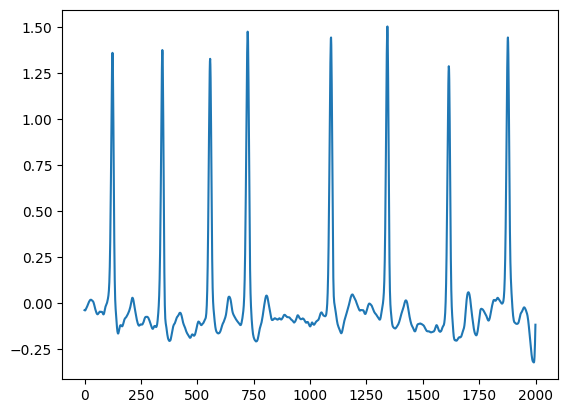

In [30]:
# # Run QRS detection on signal
# xqrs = processing.XQRS(sig=filtered_signal, fs=record.fs)
# xqrs.detect()
# Alternatively, use the gateway function to get the QRS indices directly
# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

# Compare detected QRS complexes to reference annotation.
# Note, first sample in 100.atr is not a QRS.
comparitor = processing.compare_annotations(ref_sample=annotation.sample[1:],
                                            test_sample=r_peaks_ecg,
                                            window_width=int(0.1 * record.fs),
                                            signal=filtered_ecg)

# Print and plot the results
comparitor.print_summary()
comparitor.plot(title='detected QRS vs reference annotations')

In [ ]:
r_peaks_ecg[1:-1]

array([ 370,  663,  947, 1231, 1515, 1809, 2044, 2403, 2706, 2998, 3283,
       3560, 3863, 4170, 4466, 4765, 5060, 5347, 5634, 5919, 6214, 6527,
       6824])

In [ ]:
classes = ['N', 'V', 'A', 'L', 'R', 'E', 'F', 'L', 'R', 'a', 'V', 'F', 'J']
input_size = 256
len(classes)

13

In [ ]:
# peaks, _ = find_peaks(filtered_signal, distance=150)
# print(corrected_peak_inds)
# print(peaks)

csv_filename = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\example.csv'

data_list = []

for peak in r_peaks_ecg[2:-1]:
    start, end = peak-input_size//2, peak+input_size//2

    ann = wfdb.rdann(f'D:\\Downloads\\mit-bih-arrhythmia-database-1.0.0\\{record_name}', extension='atr', sampfrom=start, sampto=end, return_label_elements=['symbol'])
    ann_symbol = ann.symbol

    if len(ann_symbol) == 1 and (ann_symbol[0] in classes) and (ann_symbol[0] != 'N' or np.random.random()<0.13):
        row_data = np.append(filtered_ecg[start:end], ann_symbol[0])
        data_list.append(row_data)
        
        print(row_data)
        print(len(filtered_ecg[start:end]))

# Save to CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write data
    csv_writer.writerows(data_list)


['-0.062348536669929615' '-0.059537240548847084' '-0.05539877958382722'
 '-0.05013723698252948' '-0.04436485924581933' '-0.037571443922768705'
 '-0.030063115120757232' '-0.0216357928931229' '-0.013411927932933795'
 '-0.00528948116471758' '0.0024254231944227287' '0.009528701716551532'
 '0.015612189314032621' '0.020573843321274814' '0.02420958022954022'
 '0.02723368385032538' '0.02923798898894788' '0.030222493689562945'
 '0.030595359235283504' '0.030560665250342445' '0.03022045051654201'
 '0.02998287623868415' '0.029847940330410473' '0.029713599863308838'
 '0.029477811883368336' '0.02903853341110905' '0.028395762258039796'
 '0.027855618659443693' '0.02741810037655294' '0.026777082696684055'
 '0.026034604147660283' '0.025496784865296482' '0.025061581695579337'
 '0.025239196358073358' '0.025825544833818014' '0.02651450226343032'
 '0.027204025396229146' '0.02789411177405472' '0.02807455483345683'
 '0.028153515334414972' '0.027926909115590353' '0.027598815257742534'
 '0.027169231185922856' '

In [ ]:
df = pd.read_csv(f'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\example.csv')

unique_labels = df.iloc[:, -1].unique()
print(unique_labels)

[]


In [ ]:
df.head()

,-0.062348536669929615,-0.059537240548847084,-0.05539877958382722,-0.05013723698252948,-0.04436485924581933,-0.037571443922768705,-0.030063115120757232,-0.0216357928931229,-0.013411927932933795,-0.00528948116471758,...,-0.0015221509088540212,0.0029853987435046114,0.007696842458142754,0.012204013835718399,0.016506909757131233,0.02019736385298705,0.022663128136325587,0.024108281165958857,0.024634860699603522,A


In [ ]:
import os

folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

df_list = []

for csv in csv_files:
    file_path = os.path.join(folder_path, csv)
    try:
        # Try reading the file using default UTF-8 encoding
        df = pd.read_csv(file_path)
        df_list.append(df)
    except UnicodeDecodeError:
        try:
            # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
            df = pd.read_csv(file_path, sep='\t', encoding='utf-16')
            df_list.append(df)
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")
    except Exception as e:
        print(f"Could not read file {csv} because of error: {e}")

# Concatenate all data into one DataFrame
big_df = pd.concat(df_list, ignore_index=True)

# Save the final result to a new CSV file
big_df.to_csv(os.path.join(folder_path, 'merge_all_records.csv'), index=False)
# file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# df_append = pd.DataFrame()

# for file in file_list:
#     df_temp = pd.read_csv(file)
#     df_append = df_append.append()
# dfs_to_concat = []

# for file in file_list:
#     df_temp = pd.read_csv(file)
#     dfs_to_concat.append(df_temp)

# df_append = pd.concat(dfs_to_concat, ignore_index=True)

# df_append.to_csv('C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted_example\\merge_all_records.csv')
# df_append.head()


Could not read file example_x.csv because of error: No columns to parse from file


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8928\2309195930.py:15: DtypeWarning: Columns (256,513) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
